In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('datasets/placement3.csv')

In [18]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [19]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

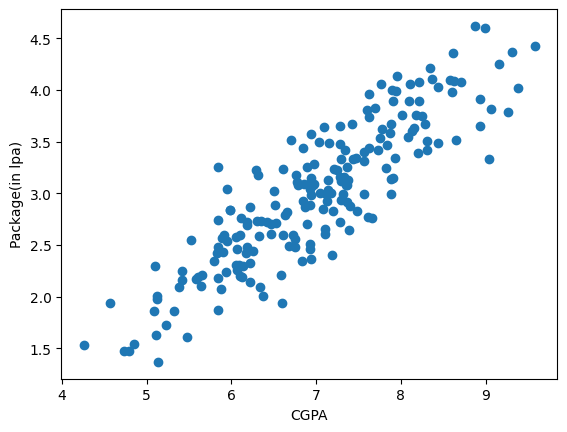

In [20]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [21]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [22]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

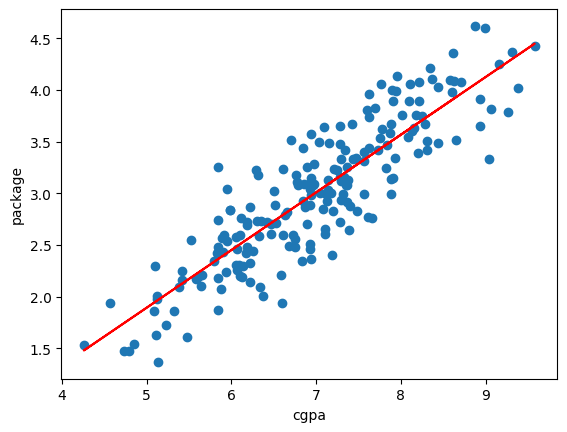

In [27]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package');

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [33]:
y_pred = lr.predict(X_test)

In [35]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [34]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [36]:
print("MAE", mean_absolute_error(y_test, y_pred))

MAE 0.2884710931878175


In [37]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.12129235313495527


In [39]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.34827051717731616


In [43]:
print("R2 Score", r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.780730147510384


In [44]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [46]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [50]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.003065,3.26
1,5.12,0.921573,1.98
2,7.82,0.328853,3.25
3,7.42,0.138338,3.67
4,6.94,0.490877,3.57


Text(0, 0.5, 'Package(in lpa)')

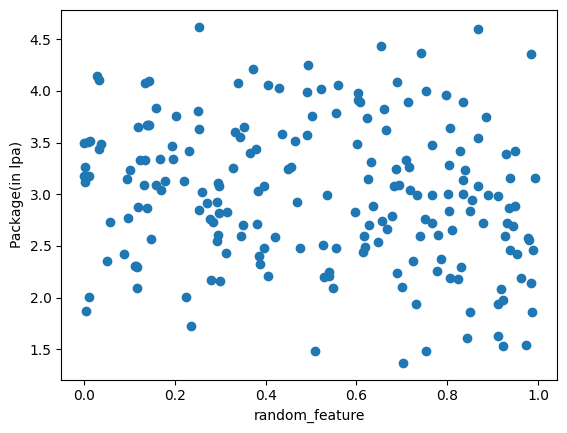

In [51]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [52]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(X_test)

In [60]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7827455837507626


In [61]:
X_test.shape

(40, 2)

In [63]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7710021017913444

In [69]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [70]:
new_df2.sample(5)

,cgpa,iq,package
56,5.84,2.24,2.74
120,5.23,1.73,1.73
2,7.82,2.05,3.25
4,6.94,4.57,3.57
119,7.39,2.15,2.65


Text(0, 0.5, 'Package(in lpa)')

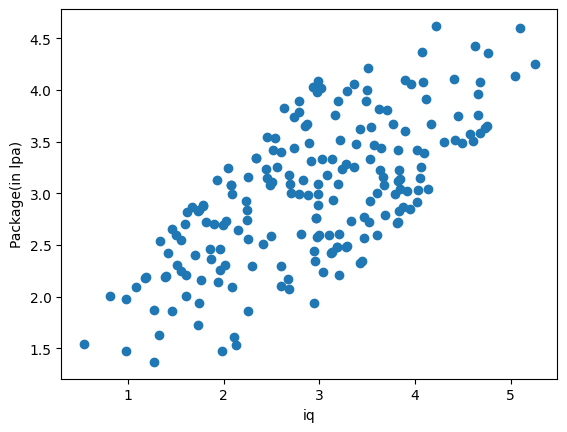

In [71]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [72]:
np.random.randint(-100,100)

-94

In [73]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [76]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8032314874979817


In [77]:
X_test.shape

(40, 2)

In [78]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7925953516870617